In [1]:
%load_ext autoreload
%autoreload 2

## Required preamble material

Importing all kinds of stuff

In [15]:
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

#import sys
#sys.path.append("functions/")

import read_sat_functions as rs

In [ ]:
! ls 

In [16]:
rs.test_print()

 Holy crap ... it worked!  Didn't it?!? 


## Log in to NASA Earthdata

May be unnecessary as the persist keyword puts info in .netrc

In [3]:
auth = earthaccess.login(persist=True)

## List available data

In [53]:
rs.list_avail_oci()

PACE_OCI_L1B_SCI
PACE_OCI_L2_AOP
PACE_OCI_L2_BGC_NRT
PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC
PACE_OCI_L2_CLOUD
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3M_AVW
PACE_OCI_L3M_AVW_NRT
PACE_OCI_L3M_CARBON
PACE_OCI_L3M_CARBON_NRT
PACE_OCI_L3M_CHL
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L3M_CLOUD
PACE_OCI_L3M_CLOUD_NRT
PACE_OCI_L3M_FLH
PA

In [54]:
rs.list_avail_harp2()

PACE_HARP2_L0_D1
PACE_HARP2_L0_D2
PACE_HARP2_L0_D3
PACE_HARP2_L1A_SCI
PACE_HARP2_L1B_SCI
PACE_HARP2_L1C_SCI
PACE_HARP2_L2_CLOUD_GPC
PACE_HARP2_L2_CLOUD_GPC_NRT
PACE_HARP2_L3M_CLOUD_GPC_NRT


In [55]:
rs.list_avail_spexone()

PACE_SPEXONE_L0
PACE_SPEXONE_L1A_SCI
PACE_SPEXONE_L1B_SCI
PACE_SPEXONE_L1C_SCI
PACE_SPEXONE_L2_AER_RTAPLAND
PACE_SPEXONE_L2_AER_RTAPLAND_NRT
PACE_SPEXONE_L2_AER_RTAPOCEAN
PACE_SPEXONE_L2_AER_RTAPOCEAN_NRT
PACE_SPEXONE_L3M_AER_RTAP
PACE_SPEXONE_L3M_AER_RTAPLAND
PACE_SPEXONE_L3M_AER_RTAPLAND_NRT
PACE_SPEXONE_L3M_AER_RTAPOCEAN
PACE_SPEXONE_L3M_AER_RTAPOCEAN_NRT
PACE_SPEXONE_L3M_AER_RTAP_NRT


## Find L2 files multiple ways

Finding the desired file a few different ways ...

Searching for PACE_OCI.20240617T175656.L2

In [6]:
tspan = ("2024-06-17", "2024-06-17")
location = (-76, 37)
bbox = (-76.75, 36.97, -75.74, 39.01)

In [7]:
bgc_file2 = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC",
    temporal=tspan,
    point=location,
)
aop_file = earthaccess.search_data(
    short_name="PACE_OCI_L2_AOP",
    temporal=tspan,
    bounding_box=bbox,
)
bgc_file = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC",
    granule_name="*20240617T175656*",
)

In [8]:
bgc_file[0]

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_BGC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 49.17929, 'Longitude': -66.59685}, {'Latitude': 43.12004, 'Longitude': -100.76629}, {'Latitude': 26.03776, 'Longitude': -92.21906}, {'Latitude': 31.37061, 'Longitude': -65.332}, {'Latitude': 49.17929, 'Longitude': -66.59685}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-17T18:01:55Z', 'BeginningDateTime': '2024-06-17T17:56:56Z'}}
Size(MB): 13.298016548156738
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240617T175656.L2.OC_BGC.V3_0.nc']

In [7]:
aop_file[0]

Collection: {'ShortName': 'PACE_OCI_L2_AOP', 'Version': '3.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 49.17929, 'Longitude': -66.59685}, {'Latitude': 43.12004, 'Longitude': -100.76629}, {'Latitude': 26.03776, 'Longitude': -92.21906}, {'Latitude': 31.37061, 'Longitude': -65.332}, {'Latitude': 49.17929, 'Longitude': -66.59685}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-17T18:01:55Z', 'BeginningDateTime': '2024-06-17T17:56:56Z'}}
Size(MB): 146.90893459320068
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240617T175656.L2.OC_AOP.V3_0.nc']

In [8]:
bgc_file2[0]

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_BGC'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 49.17929, 'Longitude': -66.59685}, {'Latitude': 43.12004, 'Longitude': -100.76629}, {'Latitude': 26.03776, 'Longitude': -92.21906}, {'Latitude': 31.37061, 'Longitude': -65.332}, {'Latitude': 49.17929, 'Longitude': -66.59685}]}}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-06-17T18:01:55Z', 'BeginningDateTime': '2024-06-17T17:56:56Z'}}
Size(MB): 13.298016548156738
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240617T175656.L2.OC_BGC.V3_0.nc']

In [10]:
bgc_local = '/home/jovyan/data/PACE_OCI.20240617T175656.L2.OC_BGC.V2_0.NRT.nc'

## Open L2 data files

In [11]:
bgcl = rs.open_data(bgc_local,loc='local')
bgcc = rs.open_data(bgc_file)

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

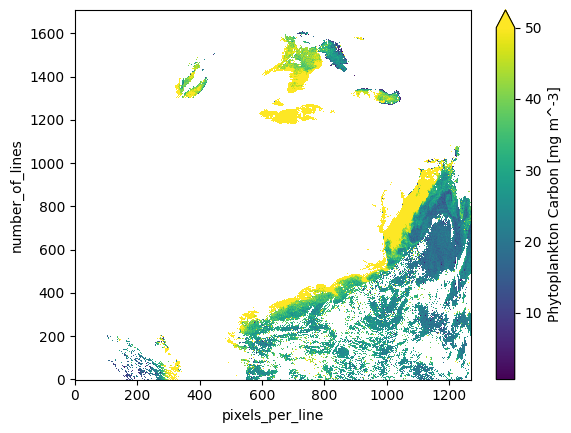

In [27]:
artist = bgcl["carbon_phyto"].plot(vmax=50)

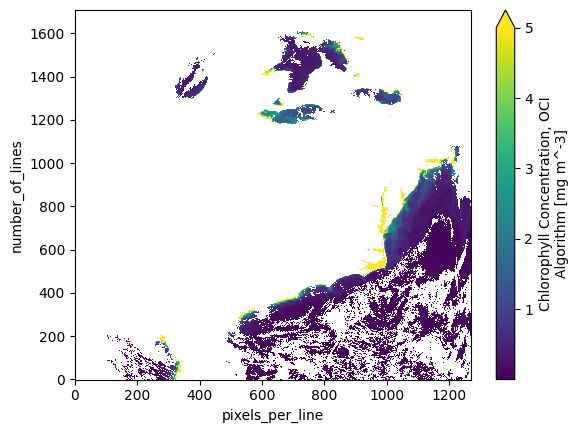

In [26]:
artist = bgcc["chlor_a"].plot(vmax=5)

In [ ]:
#rrs413 = aop_data["Rrs"][:,:,30]
#rrs442 = aop_data["Rrs"][:,:,42]
#rrs490 = aop_data["Rrs"][:,:,61]
#rrs510 = aop_data["Rrs"][:,:,69]
#rrs555 = aop_data["Rrs"][:,:,87]
#rrs670 = aop_data["Rrs"][:,:,145]

In [ ]:
#mbr = rrs442 / rrs555

In [ ]:
#mbr.plot()

In [ ]:
#chla = bgc_data["chlor_a"]

## Find L3 files

In [41]:
tspan = ("2024-04-12", "2024-04-24")

l3_cloud = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=tspan,
    granule_name="*.DAY.*.0p1deg.*",
)

In [4]:
#paths = earthaccess.download(l3_cloud[0], local_path="data")

l3_local = '/home/jovyan/data/PACE_OCI.20240412.L3m.DAY.CHL.V3_0.chlor_a.0p1deg.nc'

In [51]:
l3mc = rs.open_data(l3_cloud,level='L3')
l3ml = rs.open_data(l3_local,level='L3',loc='local')

QUEUEING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/13 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/13 [00:00<?, ?it/s]

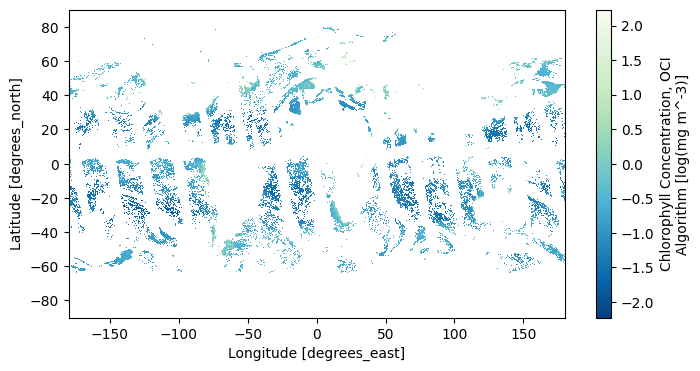

In [49]:
chla = np.log10(l3mc["chlor_a"])
chla.attrs.update(
    {
        "units": f'log({l3mc["chlor_a"].attrs["units"]})',
    }
)
plot = chla.plot(aspect=2, size=4, cmap="GnBu_r")

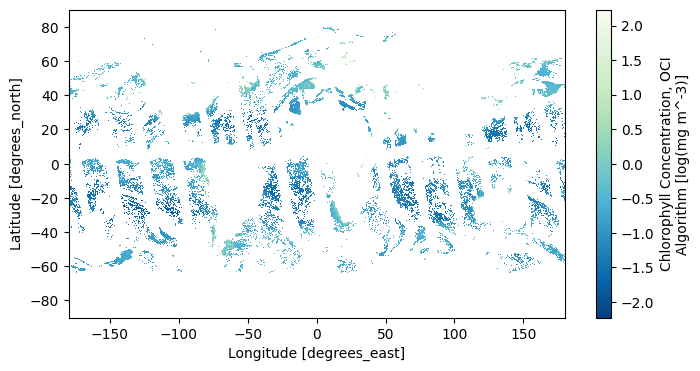

In [52]:
chla = np.log10(l3ml["chlor_a"])
chla.attrs.update(
    {
        "units": f'log({l3ml["chlor_a"].attrs["units"]})',
    }
)
plot = chla.plot(aspect=2, size=4, cmap="GnBu_r")